###**Directorio de trabajo**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ruta= '/content/gdrive/Shareddrives/Seminario Posgrado/2023-2S'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###**Librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import tensorflow.keras as keras
import warnings
import random
import numpy as np
!pip install deap
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

#**<center>Base Pequeña (699 registros) </center>**

## **Importación de datos**

In [ ]:
Wisconsin=pd.read_excel("/content/gdrive/Shareddrives/Seminario Posgrado/2023-2S/CancerWisconsin.xlsx")

y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
a = np.array(x)


##**Algoritmo genético**

In [ ]:
import random
import numpy as np
!pip install deap
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import time


#Tambíen veremos el tiempo de ejecución
inicio = time.time()

# Genera datos de ejemplo (reemplaza esto con tus propios datos)
y=np.array(y)
x2=Wisconsin.drop(['Class'], axis=1)
n_features=7


# Divide los datos en conjuntos de entrenamiento y prueba
x2_train, x2_test, y_train, y_test = train_test_split(x2, y)

# Define la función de aptitud
def fitness(individual):
    # individual es una lista de 0s y 1s que representan las variables explicativas seleccionadas
    selected_features = [i for i, select in enumerate(individual) if select]

    if not selected_features:
        return float("inf"),  # Si no se seleccionan variables, devolvemos un valor alto de MSE

    # Selecciona las columnas correspondientes a las variables seleccionadas

    # Convierte los DataFrames de Pandas en matrices NumPy
    x2_train_np = x2_train.to_numpy()
    x2_test_np = x2_test.to_numpy()


    x2_train_selected = x2_train_np[:, selected_features]
    x2_test_selected = x2_test_np[:, selected_features]

    # Entrena un modelo de regresión logística
    model = LogisticRegression()
    model.fit(x2_train_selected, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(x2_test_selected)

    # Calcula el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    return mse,

# Configura DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)  # Variables explicativas seleccionadas (0 o 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Crea una población inicial
population = toolbox.population(n=50)

# Ejecuta el algoritmo genético
n_generations = 500
for generation in range(n_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Obtiene el mejor individuo
best_individual = tools.selBest(population, k=1)[0]
best_features = [i for i, select in enumerate(best_individual) if select]

fin = time.time()
print('\n El algortimo genético entregó las mejores características en ',round(fin-inicio,4),'segundos \n')

print("Mejor conjunto de variables explicativas:", best_features)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



 El algortimo genético entregó las mejores características en  69.4695 segundos 

Mejor conjunto de variables explicativas: [2, 3, 4, 6]


##**Configuramos los modelos**

### **Primero usamos todas las variables**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x2=scaler.transform(x)

# Creamos los modelos con cada uno de los Kernel seleccionados
clf_lin = SVC(kernel='linear', max_iter=-1)
clf_poly = SVC(kernel='poly', max_iter=-1)
clf_rad = SVC(kernel='rbf', max_iter=-1)
clf_sig = SVC(kernel='sigmoid', max_iter=-1)

# Ajustamos los modelos con los datos seleccionados y hallamos las predicciones, así como las diferencias entre el ajuste del modelo y los valores reales
inicio_lin = time.time()
clf_lin.fit(x2, y)
pred_lin=clf_lin.predict(x2)
dif_lin=(pred_lin-y)
fin_lin = time.time()

inicio_poly = time.time()
clf_poly.fit(x2, y)
pred_poly=clf_poly.predict(x2)
dif_poly=(pred_poly-y)
fin_poly = time.time()

inicio_rad = time.time()
clf_rad.fit(x2, y)
pred_rad=clf_rad.predict(x2)
dif_rad=(pred_rad-y)
fin_rad = time.time()

inicio_sig = time.time()
clf_sig.fit(x2, y)
pred_sig=clf_sig.predict(x2)
dif_sig=(pred_sig-y)
fin_sig = time.time()


###**Configuramos los modelos con las variables recomendadas por el Algoritmo genético**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
columnas_seleccionadas = [2, 3, 4, 6]

# Utiliza .iloc para seleccionar las columnas por índice
x=x2[:, columnas_seleccionadas]
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x2=scaler.transform(x)

# Creamos los modelos con cada uno de los Kernel seleccionados
clf_lin_AG = SVC(kernel='linear', max_iter=-1)
clf_poly_AG = SVC(kernel='poly', max_iter=-1)
clf_rad_AG = SVC(kernel='rbf', max_iter=-1)
clf_sig_AG = SVC(kernel='sigmoid', max_iter=-1)


# Ajustamos los modelos con los datos seleccionados y hallamos las predicciones, así como las diferencias entre el ajuste del modelo y los valores reales
inicio_lin_AG = time.time()
clf_lin_AG.fit(x2, y)
pred_lin_AG=clf_lin_AG.predict(x2)
dif_lin_AG=(pred_lin_AG-y)
fin_lin_AG = time.time()

inicio_poly_AG = time.time()
clf_poly_AG.fit(x2, y)
pred_poly_AG=clf_poly_AG.predict(x2)
dif_poly_AG=(pred_poly_AG-y)
fin_poly_AG = time.time()

inicio_rad_AG = time.time()
clf_rad_AG.fit(x2, y)
pred_rad_AG=clf_rad_AG.predict(x2)
dif_rad_AG=(pred_rad_AG-y)
fin_rad_AG = time.time()

inicio_sig_AG = time.time()
clf_sig_AG.fit(x2, y)
pred_sig_AG=clf_sig_AG.predict(x2)
dif_sig_AG=(pred_sig_AG-y)
fin_sig_AG = time.time()


###**Hallamos las medidas e imprimimos los resultados**



In [ ]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Aplica la prueba F y valor AUC de la curva ROC

f_statistic_lin, p_value_lin = f_oneway(pred_lin, y)
roc_lin=roc_auc_score(pred_lin, y)
acu_lin=accuracy_score(pred_lin, y)

f_statistic_poly, p_value_poly = f_oneway(pred_poly, y)
roc_poly=roc_auc_score(pred_poly, y)
acu_poly=accuracy_score(pred_poly, y)

f_statistic_rad, p_value_rad = f_oneway(pred_rad, y)
roc_rad=roc_auc_score(pred_rad, y)
acu_rad=accuracy_score(pred_rad, y)

f_statistic_sig, p_value_sig = f_oneway(pred_sig, y)
roc_sig=roc_auc_score(pred_sig, y)
acu_sig=accuracy_score(pred_sig, y)

# Ahora con algoritmo genético

f_statistic_lin_AG, p_value_lin_AG = f_oneway(pred_lin_AG, y)
roc_lin_AG=roc_auc_score(pred_lin_AG, y)
acu_lin_AG=accuracy_score(pred_lin_AG, y)

f_statistic_poly_AG, p_value_poly_AG = f_oneway(pred_poly_AG, y)
roc_poly_AG=roc_auc_score(pred_poly_AG, y)
acu_poly_AG=accuracy_score(pred_poly_AG, y)

f_statistic_rad_AG, p_value_rad_AG = f_oneway(pred_rad_AG, y)
roc_rad_AG=roc_auc_score(pred_rad_AG, y)
acu_rad_AG=accuracy_score(pred_rad_AG, y)

f_statistic_sig_AG, p_value_sig_AG = f_oneway(pred_sig_AG, y)
roc_sig_AG=roc_auc_score(pred_sig_AG, y)
acu_sig_AG=accuracy_score(pred_sig_AG, y)

#Imprimimos las precisiones y los tiempos
print("La precisición del kernell lineal es ", round(acu_lin*100,3),", el p-valor del estadístico F es", round(p_value_lin,6), 'y el valor auc-roc es de', round(roc_lin,6),'en',round(fin_lin-inicio_lin,4),"segundos \n")
print("La precisición del kernell polinomial es ", round(acu_poly*100,3),", el p-valor del estadístico F es", round(p_value_poly,6), 'y el valor auc-roc es de', round(roc_poly,6),'en',round(fin_poly-inicio_poly,4),"segundos \n")
print("La precisición del kernell radial es ", round(acu_rad*100,3),", el p-valor del estadístico F es", round(p_value_rad,6), 'y el valor auc-roc es de', round(roc_rad,6),'en',round(fin_rad-inicio_rad,4),"segundos \n")
print("La precisición del kernell sigmoide es ", round(acu_sig*100,3),", el p-valor del estadístico F es", round(p_value_sig,6), 'y el valor auc-roc es de', round(roc_sig,6),'en',round(fin_sig-inicio_sig,4),"segundos \n")

print("La precisición del kernell lineal con AG es ", round(acu_lin_AG*100,3),", el p-valor del estadístico F es", round(p_value_lin_AG,6), 'y el valor auc-roc es de', round(roc_lin_AG,6),'en',round(fin_lin_AG-inicio_lin_AG,4),"segundos \n")
print("La precisición del kernell polinomial con AG es ", round(acu_poly_AG*100,3),", el p-valor del estadístico F es", round(p_value_poly_AG,6), 'y el valor auc-roc es de', round(roc_poly_AG,6),'en',round(fin_poly_AG-inicio_poly_AG,4),"segundos \n")
print("La precisición del kernell radial con AG es ", round(acu_rad_AG*100,3),", el p-valor del estadístico F es", round(p_value_rad_AG,6), 'y el valor auc-roc es de', round(roc_rad_AG,6),'en',round(fin_rad_AG-inicio_rad_AG,4),"segundos \n")
print("La precisición del kernell sigmoide con AG es ", round(acu_sig_AG*100,3),", el p-valor del estadístico F es", round(p_value_sig_AG,6), 'y el valor auc-roc es de', round(roc_sig_AG,6),'en',round(fin_sig_AG-inicio_sig_AG,4),"segundos \n")


La precisición del kernell lineal es  97.218 , el p-valor del estadístico F es 0.777395 y el valor auc-roc es de 0.967437 en 0.0072 segundos 

La precisición del kernell polinomial es  97.95 , el p-valor del estadístico F es 0.909662 y el valor auc-roc es de 0.978373 en 0.0044 segundos 

La precisición del kernell radial es  97.657 , el p-valor del estadístico F es 0.734532 y el valor auc-roc es de 0.971843 en 0.0053 segundos 

La precisición del kernell sigmoide es  71.157 , el p-valor del estadístico F es 0.954781 y el valor auc-roc es de 0.682882 en 0.0136 segundos 

La precisición del kernell lineal con AG es  96.34 , el p-valor del estadístico F es 0.954781 y el valor auc-roc es de 0.960183 en 0.0032 segundos 

La precisición del kernell polinomial con AG es  95.9 , el p-valor del estadístico F es 0.424186 y el valor auc-roc es de 0.961519 en 0.0049 segundos 

La precisición del kernell radial con AG es  96.047 , el p-valor del estadístico F es 0.954824 y el valor auc-roc es de 0.

### **Gráficos asociados a las estadísticas de interés**

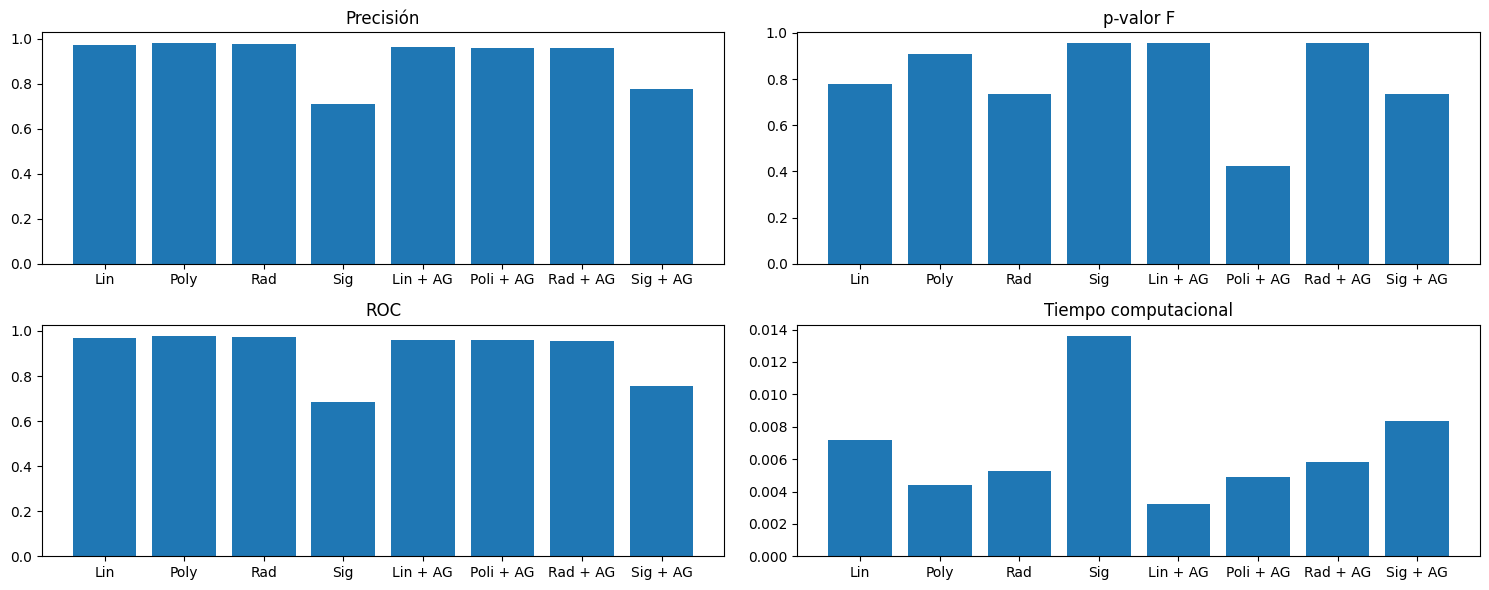

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza estos valores con los tuyos)
categorias = ['Lin','Poly','Rad','Sig','Lin + AG','Poli + AG','Rad + AG','Sig + AG']
valores_1 = [acu_lin,acu_poly,acu_rad,acu_sig,acu_lin_AG,acu_poly_AG,acu_rad_AG,acu_sig_AG]
valores_2 = [p_value_lin,p_value_poly,p_value_rad,p_value_sig,p_value_lin_AG,p_value_poly_AG,p_value_rad_AG,p_value_sig_AG]
valores_3 = [roc_lin,roc_poly,roc_rad,roc_sig,roc_lin_AG,roc_poly_AG,roc_rad_AG,roc_sig_AG]
valores_4 = [fin_lin-inicio_lin,fin_poly-inicio_poly,fin_rad-inicio_rad,fin_sig-inicio_sig,fin_lin_AG-inicio_lin_AG,fin_poly_AG-inicio_poly_AG, fin_rad_AG-inicio_rad_AG, fin_sig_AG-inicio_sig_AG]

# Crear cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

# Gráfico 1
axs[0, 0].bar(categorias, valores_1)
axs[0, 0].set_title('Precisión')

# Gráfico 2
axs[0, 1].bar(categorias, valores_2)
axs[0, 1].set_title('p-valor F')

# Gráfico 3
axs[1, 0].bar(categorias, valores_3)
axs[1, 0].set_title('ROC')

# Gráfico 4
axs[1, 1].bar(categorias, valores_4)
axs[1, 1].set_title('Tiempo computacional')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

##**Ensamblaje por Bagging**

###**Creamos los modelos**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por bagging
inicio_lin = time.time()
bagging_model_li = BaggingClassifier(base_estimator=clf_lin, n_estimators=10, random_state=0)
bagging_model_li.fit(x_train, y_train)
pred_lin = bagging_model_li.predict(x)
fin_lin = time.time()

inicio_poly = time.time()
bagging_model_poly = BaggingClassifier(base_estimator=clf_poly, n_estimators=10, random_state=0)
bagging_model_poly.fit(x_train, y_train)
pred_poly = bagging_model_poly.predict(x)
fin_poly = time.time()

inicio_rad = time.time()
bagging_model_rad = BaggingClassifier(base_estimator=clf_rad, n_estimators=10, random_state=0)
bagging_model_rad.fit(x_train, y_train)
pred_rad = bagging_model_rad.predict(x)
fin_rad = time.time()

inicio_sig = time.time()
bagging_model_sig = BaggingClassifier(base_estimator=clf_sig, n_estimators=10, random_state=0)
bagging_model_sig.fit(x_train, y_train)
pred_sig = bagging_model_sig.predict(x)
fin_sig = time.time()



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


###**Ahora para los modelos de AG**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
columnas_seleccionadas = [2, 3, 4, 6]

# Utiliza .iloc para seleccionar las columnas por índice
x=x2
a = np.array(x)


# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por bagging
inicio_lin_AG = time.time()
bagging_model_li_AG = BaggingClassifier(base_estimator=clf_lin_AG, n_estimators=10, random_state=0)
bagging_model_li_AG.fit(x_train, y_train)
pred_lin_AG = bagging_model_li_AG.predict(x)
fin_lin_AG = time.time()

inicio_poly_AG = time.time()
bagging_model_poly_AG = BaggingClassifier(base_estimator=clf_poly_AG, n_estimators=10, random_state=0)
bagging_model_poly_AG.fit(x_train, y_train)
pred_poly_AG = bagging_model_poly_AG.predict(x)
fin_poly_AG = time.time()

inicio_rad_AG = time.time()
bagging_model_rad_AG = BaggingClassifier(base_estimator=clf_rad_AG, n_estimators=10, random_state=0)
bagging_model_rad_AG.fit(x_train, y_train)
pred_rad_AG = bagging_model_rad_AG.predict(x)
fin_rad_AG = time.time()

inicio_sig_AG = time.time()
bagging_model_sig_AG = BaggingClassifier(base_estimator=clf_sig_AG, n_estimators=10, random_state=0)
bagging_model_sig_AG.fit(x_train, y_train)
pred_sig_AG = bagging_model_sig_AG.predict(x)
fin_sig_AG = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


###**Ahora determinamos las medidas de interés**



In [ ]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Aplica la prueba F y valor AUC de la curva ROC

f_statistic_lin, p_value_lin = f_oneway(pred_lin, y)
roc_lin=roc_auc_score(pred_lin, y)
acu_lin=accuracy_score(pred_lin, y)

f_statistic_poly, p_value_poly = f_oneway(pred_poly, y)
roc_poly=roc_auc_score(pred_poly, y)
acu_poly=accuracy_score(pred_poly, y)

f_statistic_rad, p_value_rad = f_oneway(pred_rad, y)
roc_rad=roc_auc_score(pred_rad, y)
acu_rad=accuracy_score(pred_rad, y)

f_statistic_sig, p_value_sig = f_oneway(pred_sig, y)
roc_sig=roc_auc_score(pred_sig, y)
acu_sig=accuracy_score(pred_sig, y)

# Ahora con algoritmo genético

f_statistic_lin_AG, p_value_lin_AG = f_oneway(pred_lin_AG, y)
roc_lin_AG=roc_auc_score(pred_lin_AG, y)
acu_lin_AG=accuracy_score(pred_lin_AG, y)

f_statistic_poly_AG, p_value_poly_AG = f_oneway(pred_poly_AG, y)
roc_poly_AG=roc_auc_score(pred_poly_AG, y)
acu_poly_AG=accuracy_score(pred_poly_AG, y)

f_statistic_rad_AG, p_value_rad_AG = f_oneway(pred_rad_AG, y)
roc_rad_AG=roc_auc_score(pred_rad_AG, y)
acu_rad_AG=accuracy_score(pred_rad_AG, y)

f_statistic_sig_AG, p_value_sig_AG = f_oneway(pred_sig_AG, y)
roc_sig_AG=roc_auc_score(pred_sig_AG, y)
acu_sig_AG=accuracy_score(pred_sig_AG, y)

#Imprimimos las precisiones y los tiempos
print("La precisición del kernell lineal es ", round(acu_lin*100,3),", el p-valor del estadístico F es", round(p_value_lin,6), 'y el valor auc-roc es de', round(roc_lin,6),'en',round(fin_lin-inicio_lin,4),"segundos \n")
print("La precisición del kernell polinomial es ", round(acu_poly*100,3),", el p-valor del estadístico F es", round(p_value_poly,6), 'y el valor auc-roc es de', round(roc_poly,6),'en',round(fin_poly-inicio_poly,4),"segundos \n")
print("La precisición del kernell radial es ", round(acu_rad*100,3),", el p-valor del estadístico F es", round(p_value_rad,6), 'y el valor auc-roc es de', round(roc_rad,6),'en',round(fin_rad-inicio_rad,4),"segundos \n")
print("La precisición del kernell sigmoide es ", round(acu_sig*100,3),", el p-valor del estadístico F es", round(p_value_sig,6), 'y el valor auc-roc es de', round(roc_sig,6),'en',round(fin_sig-inicio_sig,4),"segundos \n")

print("La precisición del kernell lineal con AG es ", round(acu_lin_AG*100,3),", el p-valor del estadístico F es", round(p_value_lin_AG,6), 'y el valor auc-roc es de', round(roc_lin_AG,6),'en',round(fin_lin_AG-inicio_lin_AG,4),"segundos \n")
print("La precisición del kernell polinomial con AG es ", round(acu_poly_AG*100,3),", el p-valor del estadístico F es", round(p_value_poly_AG,6), 'y el valor auc-roc es de', round(roc_poly_AG,6),'en',round(fin_poly_AG-inicio_poly_AG,4),"segundos \n")
print("La precisición del kernell radial con AG es ", round(acu_rad_AG*100,3),", el p-valor del estadístico F es", round(p_value_rad_AG,6), 'y el valor auc-roc es de', round(roc_rad_AG,6),'en',round(fin_rad_AG-inicio_rad_AG,4),"segundos \n")
print("La precisición del kernell sigmoide con AG es ", round(acu_sig_AG*100,3),", el p-valor del estadístico F es", round(p_value_sig_AG,6), 'y el valor auc-roc es de', round(roc_sig_AG,6),'en',round(fin_sig_AG-inicio_sig_AG,4),"segundos \n")


La precisición del kernell lineal es  96.925 , el p-valor del estadístico F es 0.864789 y el valor auc-roc es de 0.967509 en 0.03 segundos 

La precisición del kernell polinomial es  96.925 , el p-valor del estadístico F es 0.530711 y el valor auc-roc es de 0.971453 en 0.0309 segundos 

La precisición del kernell radial es  97.218 , el p-valor del estadístico F es 0.954781 y el valor auc-roc es de 0.969856 en 0.0388 segundos 

La precisición del kernell sigmoide es  70.571 , el p-valor del estadístico F es 0.391595 y el valor auc-roc es de 0.674764 en 0.0711 segundos 

La precisición del kernell lineal con AG es  96.047 , el p-valor del estadístico F es 0.69054 y el valor auc-roc es de 0.959601 en 0.1131 segundos 

La precisición del kernell polinomial con AG es  95.608 , el p-valor del estadístico F es 0.360537 y el valor auc-roc es de 0.959305 en 0.0861 segundos 

La precisición del kernell radial con AG es  96.193 , el p-valor del estadístico F es 0.909662 y el valor auc-roc es de 0

###**Gráficos**

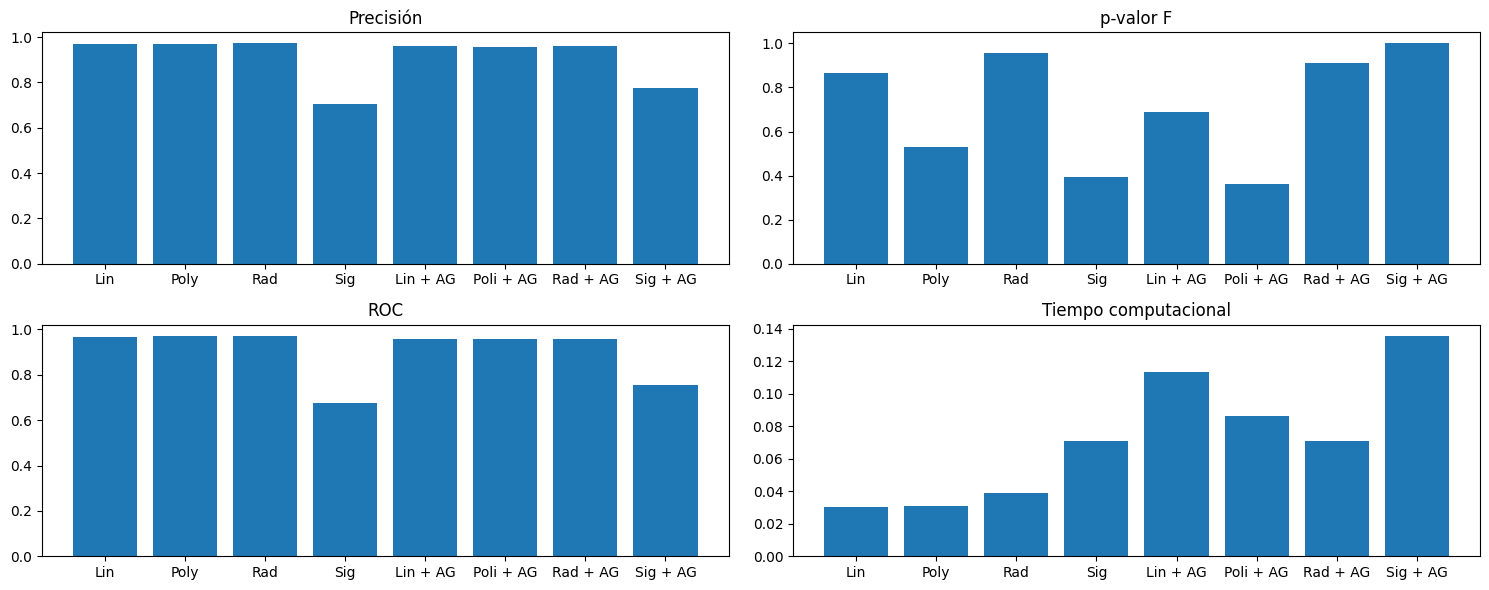

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza estos valores con los tuyos)
categorias = ['Lin','Poly','Rad','Sig','Lin + AG','Poli + AG','Rad + AG','Sig + AG']
valores_1 = [acu_lin,acu_poly,acu_rad,acu_sig,acu_lin_AG,acu_poly_AG,acu_rad_AG,acu_sig_AG]
valores_2 = [p_value_lin,p_value_poly,p_value_rad,p_value_sig,p_value_lin_AG,p_value_poly_AG,p_value_rad_AG,p_value_sig_AG]
valores_3 = [roc_lin,roc_poly,roc_rad,roc_sig,roc_lin_AG,roc_poly_AG,roc_rad_AG,roc_sig_AG]
valores_4 = [fin_lin-inicio_lin,fin_poly-inicio_poly,fin_rad-inicio_rad,fin_sig-inicio_sig,fin_lin_AG-inicio_lin_AG,fin_poly_AG-inicio_poly_AG, fin_rad_AG-inicio_rad_AG, fin_sig_AG-inicio_sig_AG]

# Crear cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

# Gráfico 1
axs[0, 0].bar(categorias, valores_1)
axs[0, 0].set_title('Precisión')

# Gráfico 2
axs[0, 1].bar(categorias, valores_2)
axs[0, 1].set_title('p-valor F')

# Gráfico 3
axs[1, 0].bar(categorias, valores_3)
axs[1, 0].set_title('ROC')

# Gráfico 4
axs[1, 1].bar(categorias, valores_4)
axs[1, 1].set_title('Tiempo computacional')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## **Ensamblaje por boosting**

###**Creamos los modelos**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por bagging
inicio_lin = time.time()
adaboost_model_li = AdaBoostClassifier(estimator=clf_lin, random_state=0, algorithm="SAMME")
adaboost_model_li.fit(x_train, y_train)
pred_lin = adaboost_model_li.predict(x)
fin_lin = time.time()

inicio_poly = time.time()
adaboost_model_poly = AdaBoostClassifier(estimator=clf_poly, random_state=0, algorithm="SAMME")
adaboost_model_poly.fit(x_train, y_train)
pred_poly = adaboost_model_poly.predict(x)
fin_poly = time.time()

inicio_rad = time.time()
adaboost_model_rad = AdaBoostClassifier(estimator=clf_rad, random_state=0, algorithm="SAMME")
adaboost_model_rad.fit(x_train, y_train)
pred_rad = adaboost_model_rad.predict(x)
fin_rad = time.time()

inicio_sig = time.time()
adaboost_model_sig = AdaBoostClassifier(estimator=clf_sig, random_state=0, algorithm="SAMME")
adaboost_model_sig.fit(x_train, y_train)
pred_sig = adaboost_model_sig.predict(x)
fin_sig = time.time()


###**Ahora para los modelos de AG**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=Wisconsin["Class"]
y=np.array(y)
x=Wisconsin.drop(['Class'], axis=1)
columnas_seleccionadas = [2, 3, 4, 6]

# Utiliza .iloc para seleccionar las columnas por índice
x=x2
a = np.array(x)


# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por boosting
inicio_lin_AG = time.time()
adaboost_model_li_AG = AdaBoostClassifier(estimator=clf_lin_AG, random_state=0, algorithm="SAMME")
adaboost_model_li_AG.fit(x_train, y_train)
pred_lin_AG = adaboost_model_li_AG.predict(x)
fin_lin_AG = time.time()

inicio_poly_AG = time.time()
adaboost_model_poly_AG = AdaBoostClassifier(estimator=clf_poly_AG, random_state=0, algorithm="SAMME")
adaboost_model_poly_AG.fit(x_train, y_train)
pred_poly_AG = adaboost_model_poly_AG.predict(x)
fin_poly_AG = time.time()

inicio_rad_AG = time.time()
adaboost_model_rad_AG = AdaBoostClassifier(estimator=clf_rad_AG, random_state=0, algorithm="SAMME")
adaboost_model_rad_AG.fit(x_train, y_train)
pred_rad_AG = adaboost_model_rad_AG.predict(x)
fin_rad_AG = time.time()

inicio_sig_AG = time.time()
adaboost_model_sig_AG = AdaBoostClassifier(estimator=clf_sig_AG, random_state=0, algorithm="SAMME")
adaboost_model_sig_AG.fit(x_train, y_train)
pred_sig_AG = adaboost_model_sig_AG.predict(x)
fin_sig_AG = time.time()

###**Ahora determinamos las medidas de interés**

In [ ]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Aplica la prueba F y valor AUC de la curva ROC

f_statistic_lin, p_value_lin = f_oneway(pred_lin, y)
roc_lin=roc_auc_score(pred_lin, y)
acu_lin=accuracy_score(pred_lin, y)

f_statistic_poly, p_value_poly = f_oneway(pred_poly, y)
roc_poly=roc_auc_score(pred_poly, y)
acu_poly=accuracy_score(pred_poly, y)

f_statistic_rad, p_value_rad = f_oneway(pred_rad, y)
roc_rad=roc_auc_score(y,pred_rad)
acu_rad=accuracy_score(pred_rad, y)

f_statistic_sig, p_value_sig = f_oneway(y, pred_sig)
roc_sig=roc_auc_score(y, pred_sig)
acu_sig=accuracy_score(y, pred_sig)

# Ahora con algoritmo genético

f_statistic_lin_AG, p_value_lin_AG = f_oneway(pred_lin_AG, y)
roc_lin_AG=roc_auc_score(y, pred_lin_AG)
acu_lin_AG=accuracy_score(pred_lin_AG, y)

f_statistic_poly_AG, p_value_poly_AG = f_oneway(pred_poly_AG, y)
roc_poly_AG=roc_auc_score(y, pred_poly_AG)
acu_poly_AG=accuracy_score(pred_poly_AG, y)

f_statistic_rad_AG, p_value_rad_AG = f_oneway(pred_rad_AG, y)
roc_rad_AG=roc_auc_score(y,pred_rad_AG)
acu_rad_AG=accuracy_score(pred_rad_AG, y)

f_statistic_sig_AG, p_value_sig_AG = f_oneway(pred_sig_AG, y)
roc_sig_AG=roc_auc_score(y, pred_sig_AG)
acu_sig_AG=accuracy_score(pred_sig_AG, y)

#Imprimimos las precisiones y los tiempos
print("La precisición del kernell lineal es ", round(acu_lin*100,3),", el p-valor del estadístico F es", round(p_value_lin,6), 'y el valor auc-roc es de', round(roc_lin,6),'en',round(fin_lin-inicio_lin,4),"segundos \n")
print("La precisición del kernell polinomial es ", round(acu_poly*100,3),", el p-valor del estadístico F es", round(p_value_poly,6), 'y el valor auc-roc es de', round(roc_poly,6),'en',round(fin_poly-inicio_poly,4),"segundos \n")
print("La precisición del kernell radial es ", round(acu_rad*100,3),", el p-valor del estadístico F es", round(p_value_rad,6), 'y el valor auc-roc es de', round(roc_rad,6),'en',round(fin_rad-inicio_rad,4),"segundos \n")
print("La precisición del kernell sigmoide es ", round(acu_sig*100,3),", el p-valor del estadístico F es", round(p_value_sig,6), 'y el valor auc-roc es de', round(roc_sig,6),'en',round(fin_sig-inicio_sig,4),"segundos \n")

print("La precisición del kernell lineal con AG es ", round(acu_lin_AG*100,3),", el p-valor del estadístico F es", round(p_value_lin_AG,6), 'y el valor auc-roc es de', round(roc_lin_AG,6),'en',round(fin_lin_AG-inicio_lin_AG,4),"segundos \n")
print("La precisición del kernell polinomial con AG es ", round(acu_poly_AG*100,3),", el p-valor del estadístico F es", round(p_value_poly_AG,6), 'y el valor auc-roc es de', round(roc_poly_AG,6),'en',round(fin_poly_AG-inicio_poly_AG,4),"segundos \n")
print("La precisición del kernell radial con AG es ", round(acu_rad_AG*100,3),", el p-valor del estadístico F es", round(p_value_rad_AG,6), 'y el valor auc-roc es de', round(roc_rad_AG,6),'en',round(fin_rad_AG-inicio_rad_AG,4),"segundos \n")
print("La precisición del kernell sigmoide con AG es ", round(acu_sig_AG*100,3),", el p-valor del estadístico F es", round(p_value_sig_AG,6), 'y el valor auc-roc es de', round(roc_sig_AG,6),'en',round(fin_sig_AG-inicio_sig_AG,4),"segundos \n")


La precisición del kernell lineal es  97.365 , el p-valor del estadístico F es 0.734532 y el valor auc-roc es de 0.968661 en 0.0708 segundos 

La precisición del kernell polinomial es  94.143 , el p-valor del estadístico F es 0.037366 y el valor auc-roc es de 0.955491 en 0.1168 segundos 

La precisición del kernell radial es  65.007 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 2.2511 segundos 

La precisición del kernell sigmoide es  65.007 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 4.7771 segundos 

La precisición del kernell lineal con AG es  94.583 , el p-valor del estadístico F es 0.050572 y el valor auc-roc es de 0.957367 en 0.3438 segundos 

La precisición del kernell polinomial con AG es  91.508 , el p-valor del estadístico F es 0.005145 y el valor auc-roc es de 0.883491 en 0.3651 segundos 

La precisición del kernell radial con AG es  65.007 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 2.2118 segundos 

### **Gráficos**

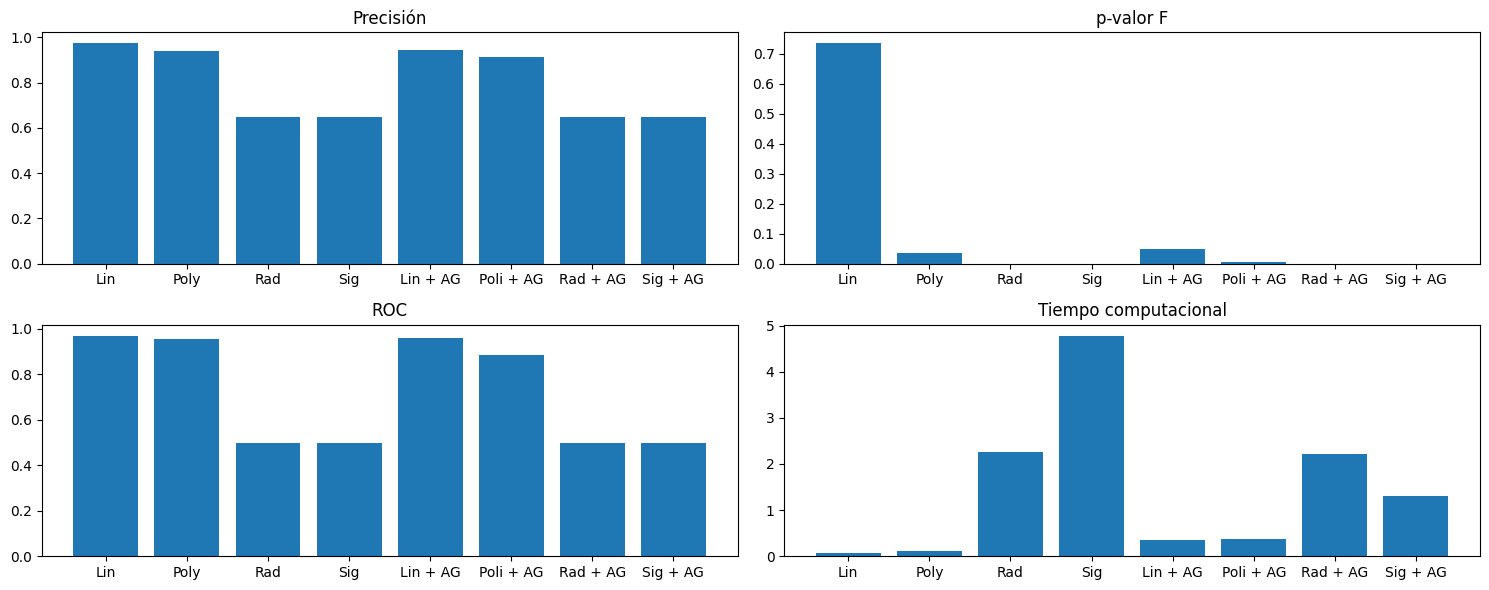

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza estos valores con los tuyos)
categorias = ['Lin','Poly','Rad','Sig','Lin + AG','Poli + AG','Rad + AG','Sig + AG']
valores_1 = [acu_lin,acu_poly,acu_rad,acu_sig,acu_lin_AG,acu_poly_AG,acu_rad_AG,acu_sig_AG]
valores_2 = [p_value_lin,p_value_poly,p_value_rad,p_value_sig,p_value_lin_AG,p_value_poly_AG,p_value_rad_AG,p_value_sig_AG]
valores_3 = [roc_lin,roc_poly,roc_rad,roc_sig,roc_lin_AG,roc_poly_AG,roc_rad_AG,roc_sig_AG]
valores_4 = [fin_lin-inicio_lin,fin_poly-inicio_poly,fin_rad-inicio_rad,fin_sig-inicio_sig,fin_lin_AG-inicio_lin_AG,fin_poly_AG-inicio_poly_AG, fin_rad_AG-inicio_rad_AG, fin_sig_AG-inicio_sig_AG]

# Crear cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

# Gráfico 1
axs[0, 0].bar(categorias, valores_1)
axs[0, 0].set_title('Precisión')

# Gráfico 2
axs[0, 1].bar(categorias, valores_2)
axs[0, 1].set_title('p-valor F')

# Gráfico 3
axs[1, 0].bar(categorias, valores_3)
axs[1, 0].set_title('ROC')

# Gráfico 4
axs[1, 1].bar(categorias, valores_4)
axs[1, 1].set_title('Tiempo computacional')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# **Base grande**

In [ ]:
import IPython
from google.colab import output




try:
    # Abre el archivo "Features.txt" en modo de lectura
    with open("/content/gdrive/Shareddrives/Seminario Posgrado/2023-2S/Features.txt", "r") as file:
        # Lee el contenido completo del archivo y almacénalo en una variable
        contenido = file.read()

    # Muestra el contenido en fragmentos o procesa la variable "contenido" según sea necesario
    print(contenido[:1000])  # Muestra las primeras 1000 caracteres
except FileNotFoundError:
    print("El archivo 'Features.txt' no se encuentra en el directorio actual.")
except Exception as e:
    print("Se produjo un error al leer el archivo:", str(e))


1.0001e+005	13278	1	1	517	3043	1286	2305
1.0001e+005	13278	1	1	85	2731	1286	2305
1.0001e+005	13278	1	1	696	2345	1286	2305
1.0001e+005	13278	1	1	895	2362	1286	2305
1.0001e+005	13278	1	1	391	2280	1286	2305
1.0001e+005	13278	1	1	755	2087	1286	2305
1.0001e+005	13278	1	1	707	2019	1286	2305
1.0001e+005	13278	1	1	752	2072	1286	2305
1.0001e+005	13278	1	1	764	2174	1286	2305
1.0002e+005	13278	0	1	2631	2798	2068	2123
1.0002e+005	13278	0	1	3097	2749	2068	2123
1.0002e+005	13278	0	1	3098	2751	2068	2123
1.0002e+005	13278	0	1	2744	2468	2068	2123
1.0002e+005	13278	0	1	2491	2417	2068	2123
1.0002e+005	13278	0	1	2401	2019	2068	2123
1.0002e+005	13278	0	1	3183	2048	2068	2123
1.0002e+005	13278	0	1	2924	1975	2068	2123
1.0002e+005	13278	0	1	2785	1946	2068	2123
1.0002e+005	13278	0	1	2819	1994	2068	2123
1.0002e+005	13278	0	1	2633	1974	2068	2123
1.0002e+005	13278	0	1	2514	1812	2068	2123
1.0002e+005	13278	0	1	2642	1957	2068	2123
1.0002e+005	13278	0	1	2856	1724	2068	2123
1.0002e+005	13278	0	1	2625	2792	2068	2123
1.

In [ ]:
import pandas as pd

# Lee el archivo "Features.txt" con separación por tabulaciones
try:
    df = pd.read_csv("/content/gdrive/Shareddrives/Seminario Posgrado/2023-2S/Features.txt", sep="\t")
    # Muestra el DataFrame
    print(df)
except FileNotFoundError:
    print("El archivo 'Features.txt' no se encuentra en el directorio actual.")
except Exception as e:
    print("Se produjo un error al leer el archivo:", str(e))

       1.0001e+005    13278  1  1.1   517  3043  1286  2305
0         100010.0  13278.0  1    1    85  2731  1286  2305
1         100010.0  13278.0  1    1   696  2345  1286  2305
2         100010.0  13278.0  1    1   895  2362  1286  2305
3         100010.0  13278.0  1    1   391  2280  1286  2305
4         100010.0  13278.0  1    1   755  2087  1286  2305
...            ...      ... ..  ...   ...   ...   ...   ...
94724      99896.0   7741.0  0    0  2663   798  1501  1778
94725      99896.0   7741.0  0    0  2180  2587  1501  1778
94726      99896.0   7741.0  0    0  1926  1940  1501  1778
94727      99896.0   7741.0  0    0  2002  1832  1501  1778
94728      99896.0   7741.0  0    0  2365   865  1501  1778

[94729 rows x 8 columns]


In [ ]:
lineas = contenido.strip().split('\n')

# Divide cada línea en elementos separados por comas y crea una lista de listas
datos = [linea.split(',') for linea in lineas]


nombres_originales = df.columns


nuevos_nombres = ['x_1','x_2','Class','x_3','x_4','x_5','x_6','x_7']

# Asigna los nuevos nombres de columnas al DataFrame
df.columns = nuevos_nombres

# Cuenta la cantidad de NaN en la columna "y"

df
# Muestra la cantidad de NaN




,x_1,x_2,Class,x_3,x_4,x_5,x_6,x_7
0,100010.0,13278.0,1,1,85,2731,1286,2305
1,100010.0,13278.0,1,1,696,2345,1286,2305
2,100010.0,13278.0,1,1,895,2362,1286,2305
3,100010.0,13278.0,1,1,391,2280,1286,2305
4,100010.0,13278.0,1,1,755,2087,1286,2305
...,...,...,...,...,...,...,...,...
94724,99896.0,7741.0,0,0,2663,798,1501,1778
94725,99896.0,7741.0,0,0,2180,2587,1501,1778
94726,99896.0,7741.0,0,0,1926,1940,1501,1778
94727,99896.0,7741.0,0,0,2002,1832,1501,1778


In [ ]:
import numpy as np
y=df["Class"]
y=np.array(y)
x2=df.drop(['Class'], axis=1)

# Obtén la dimensión de "y"
dimension_y = y.shape

# Muestra la dimensión
print("Dimensión de 'y':", dimension_y)

Dimensión de 'y': (94729,)


## **Algoritmo genético**

In [ ]:
import random
import numpy as np
!pip install deap
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import time


#Tambíen veremos el tiempo de ejecución
inicio = time.time()

# Genera datos de ejemplo (reemplaza esto con tus propios datos)
y=np.array(y)
x2=df.drop(['Class'], axis=1)
n_features=7


# Divide los datos en conjuntos de entrenamiento y prueba
x2_train, x2_test, y_train, y_test = train_test_split(x2, y)

# Define la función de aptitud
def fitness(individual):
    # individual es una lista de 0s y 1s que representan las variables explicativas seleccionadas
    selected_features = [i for i, select in enumerate(individual) if select]

    if not selected_features:
        return float("inf"),  # Si no se seleccionan variables, devolvemos un valor alto de MSE

    # Selecciona las columnas correspondientes a las variables seleccionadas

    # Convierte los DataFrames de Pandas en matrices NumPy
    x2_train_np = x2_train.to_numpy()
    x2_test_np = x2_test.to_numpy()


    x2_train_selected = x2_train_np[:, selected_features]
    x2_test_selected = x2_test_np[:, selected_features]

    # Entrena un modelo de regresión logística
    model = LogisticRegression()
    model.fit(x2_train_selected, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(x2_test_selected)

    # Calcula el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    return mse,

# Configura DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)  # Variables explicativas seleccionadas (0 o 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Crea una población inicial
population = toolbox.population(n=50)

# Ejecuta el algoritmo genético
n_generations = 20
for generation in range(n_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Obtiene el mejor individuo
best_individual = tools.selBest(population, k=1)[0]
best_features = [i for i, select in enumerate(best_individual) if select]

fin = time.time()
print('\n El algortimo genético entregó las mejores características en ',round(fin-inicio,4),'segundos \n')

print("Mejor conjunto de variables explicativas:", best_features)

Traceback (most recent call last):

^C


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-81599b5eba31>", line 75, in <cell line: 72>
    for fit, ind in zip(fits, offspring):
  File "<ipython-input-7-81599b5eba31>", line 43, in fitness
    model.fit(x2_train_selected, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1792, in _get_sequential_outpu

TypeError: ignored

##**Configuramos los modelos**

### **Primero usamos todas las variables**

In [ ]:
import time

# LLamamos nuevamente al conjuto de datos
y=df["Class"]
y=np.array(y)
x=df.drop(['Class'], axis=1)
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x2=scaler.transform(x)

# Creamos los modelos con cada uno de los Kernel seleccionados
clf_lin = SVC(kernel='linear', max_iter=-1)
clf_poly = SVC(kernel='poly', max_iter=-1)
clf_rad = SVC(kernel='rbf', max_iter=-1)
clf_sig = SVC(kernel='sigmoid', max_iter=-1)

# Ajustamos los modelos con los datos seleccionados y hallamos las predicciones, así como las diferencias entre el ajuste del modelo y los valores reales
inicio_lin = time.time()
clf_lin.fit(x2, y)
pred_lin=clf_lin.predict(x2)
dif_lin=(pred_lin-y)
fin_lin = time.time()

inicio_poly = time.time()
clf_poly.fit(x2, y)
pred_poly=clf_poly.predict(x2)
dif_poly=(pred_poly-y)
fin_poly = time.time()

inicio_rad = time.time()
clf_rad.fit(x2, y)
pred_rad=clf_rad.predict(x2)
dif_rad=(pred_rad-y)
fin_rad = time.time()


###**Configuramos los modelos con las variables recomendadas por el Algoritmo genético**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=df["Class"]
y=np.array(y)
x=df.drop(['Class'], axis=1)
columnas_seleccionadas = [0, 2, 3, 4, 5]

# Utiliza .iloc para seleccionar las columnas por índice
x=x2[:, columnas_seleccionadas]
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x2=scaler.transform(x)

# Creamos los modelos con cada uno de los Kernel seleccionados
clf_lin_AG = SVC(kernel='linear', max_iter=-1)
clf_poly_AG = SVC(kernel='poly', max_iter=-1)
clf_rad_AG = SVC(kernel='rbf', max_iter=-1)
clf_sig_AG = SVC(kernel='sigmoid', max_iter=-1)


# Ajustamos los modelos con los datos seleccionados y hallamos las predicciones, así como las diferencias entre el ajuste del modelo y los valores reales
inicio_lin_AG = time.time()
clf_lin_AG.fit(x2, y)
pred_lin_AG=clf_lin_AG.predict(x2)
dif_lin_AG=(pred_lin_AG-y)
fin_lin_AG = time.time()

inicio_poly_AG = time.time()
clf_poly_AG.fit(x2, y)
pred_poly_AG=clf_poly_AG.predict(x2)
dif_poly_AG=(pred_poly_AG-y)
fin_poly_AG = time.time()

inicio_rad_AG = time.time()
clf_rad_AG.fit(x2, y)
pred_rad_AG=clf_rad_AG.predict(x2)
dif_rad_AG=(pred_rad_AG-y)
fin_rad_AG = time.time()


###**Hallamos las medidas e imprimimos los resultados**


In [ ]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Aplica la prueba F y valor AUC de la curva ROC

f_statistic_lin, p_value_lin = f_oneway(pred_lin, y)
roc_lin=roc_auc_score(pred_lin, y)
acu_lin=accuracy_score(pred_lin, y)

f_statistic_poly, p_value_poly = f_oneway(pred_poly, y)
roc_poly=roc_auc_score(pred_poly, y)
acu_poly=accuracy_score(pred_poly, y)

f_statistic_rad, p_value_rad = f_oneway(pred_rad, y)
roc_rad=roc_auc_score(pred_rad, y)
acu_rad=accuracy_score(pred_rad, y)

# Ahora con algoritmo genético

f_statistic_lin_AG, p_value_lin_AG = f_oneway(pred_lin_AG, y)
roc_lin_AG=roc_auc_score(pred_lin_AG, y)
acu_lin_AG=accuracy_score(pred_lin_AG, y)

f_statistic_poly_AG, p_value_poly_AG = f_oneway(pred_poly_AG, y)
roc_poly_AG=roc_auc_score(pred_poly_AG, y)
acu_poly_AG=accuracy_score(pred_poly_AG, y)

f_statistic_rad_AG, p_value_rad_AG = f_oneway(pred_rad_AG, y)
roc_rad_AG=roc_auc_score(pred_rad_AG, y)
acu_rad_AG=accuracy_score(pred_rad_AG, y)

#Imprimimos las precisiones y los tiempos
print("La precisición del kernell lineal es ", round(acu_lin*100,3),", el p-valor del estadístico F es", round(p_value_lin,6), 'y el valor auc-roc es de', round(roc_lin,6),'en',round(fin_lin-inicio_lin,4),"segundos \n")
print("La precisición del kernell polinomial es ", round(acu_poly*100,3),", el p-valor del estadístico F es", round(p_value_poly,6), 'y el valor auc-roc es de', round(roc_poly,6),'en',round(fin_poly-inicio_poly,4),"segundos \n")
print("La precisición del kernell radial es ", round(acu_rad*100,3),", el p-valor del estadístico F es", round(p_value_rad,6), 'y el valor auc-roc es de', round(roc_rad,6),'en',round(fin_rad-inicio_rad,4),"segundos \n")

print("La precisición del kernell lineal con AG es ", round(acu_lin_AG*100,3),", el p-valor del estadístico F es", round(p_value_lin_AG,6), 'y el valor auc-roc es de', round(roc_lin_AG,6),'en',round(fin_lin_AG-inicio_lin_AG,4),"segundos \n")
print("La precisición del kernell polinomial con AG es ", round(acu_poly_AG*100,3),", el p-valor del estadístico F es", round(p_value_poly_AG,6), 'y el valor auc-roc es de', round(roc_poly_AG,6),'en',round(fin_poly_AG-inicio_poly_AG,4),"segundos \n")
print("La precisición del kernell radial con AG es ", round(acu_rad_AG*100,3),", el p-valor del estadístico F es", round(p_value_rad_AG,6), 'y el valor auc-roc es de', round(roc_rad_AG,6),'en',round(fin_rad_AG-inicio_rad_AG,4),"segundos \n")


La precisición del kernell lineal es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.99999 en 7.961 segundos 

La precisición del kernell polinomial es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.999989 en 3.1581 segundos 

La precisición del kernell radial es  100.0 , el p-valor del estadístico F es 1.0 y el valor auc-roc es de 1.0 en 12.1645 segundos 

La precisición del kernell lineal con AG es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.99999 en 12.0625 segundos 

La precisición del kernell polinomial con AG es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.999989 en 1.8393 segundos 

La precisición del kernell radial con AG es  100.0 , el p-valor del estadístico F es 1.0 y el valor auc-roc es de 1.0 en 9.7297 segundos 



### **Gráficos asociados a las estadísticas de interés**

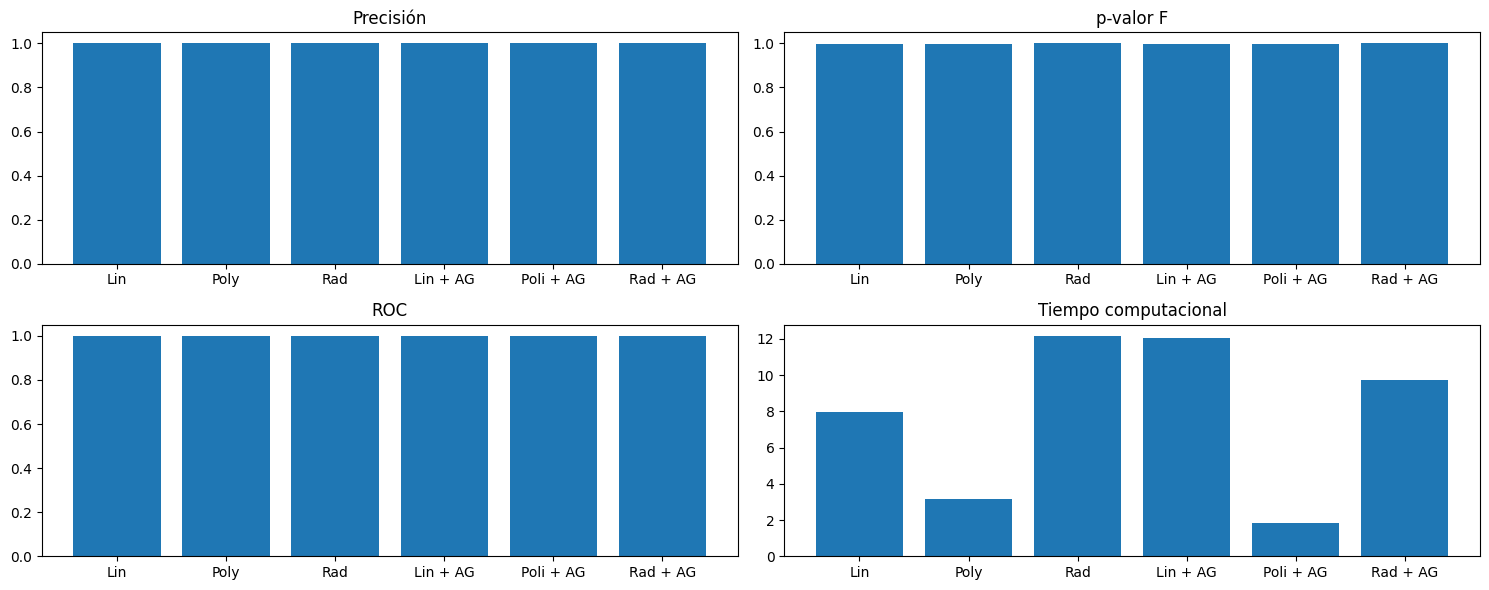

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza estos valores con los tuyos)
categorias = ['Lin','Poly','Rad','Lin + AG','Poli + AG','Rad + AG']
valores_1 = [acu_lin,acu_poly,acu_rad,acu_lin_AG,acu_poly_AG,acu_rad_AG]
valores_2 = [p_value_lin,p_value_poly,p_value_rad,p_value_lin_AG,p_value_poly_AG,p_value_rad_AG]
valores_3 = [roc_lin,roc_poly,roc_rad,roc_lin_AG,roc_poly_AG,roc_rad_AG]
valores_4 = [fin_lin-inicio_lin,fin_poly-inicio_poly,fin_rad-inicio_rad,fin_lin_AG-inicio_lin_AG,fin_poly_AG-inicio_poly_AG, fin_rad_AG-inicio_rad_AG]

# Crear cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

# Gráfico 1
axs[0, 0].bar(categorias, valores_1)
axs[0, 0].set_title('Precisión')

# Gráfico 2
axs[0, 1].bar(categorias, valores_2)
axs[0, 1].set_title('p-valor F')

# Gráfico 3
axs[1, 0].bar(categorias, valores_3)
axs[1, 0].set_title('ROC')

# Gráfico 4
axs[1, 1].bar(categorias, valores_4)
axs[1, 1].set_title('Tiempo computacional')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## **Ensamblaje por bagging**

## **Creamos los modelos**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

y=df["Class"]
y=np.array(y)
x=df.drop(['Class'], axis=1)
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por bagging
inicio_lin = time.time()
bagging_model_li = BaggingClassifier(base_estimator=clf_lin, n_estimators=10, random_state=0)
bagging_model_li.fit(x_train, y_train)
pred_lin = bagging_model_li.predict(x)
fin_lin = time.time()

inicio_poly = time.time()
bagging_model_poly = BaggingClassifier(base_estimator=clf_poly, n_estimators=10, random_state=0)
bagging_model_poly.fit(x_train, y_train)
pred_poly = bagging_model_poly.predict(x)
fin_poly = time.time()

inicio_rad = time.time()
bagging_model_rad = BaggingClassifier(base_estimator=clf_rad, n_estimators=10, random_state=0)
bagging_model_rad.fit(x_train, y_train)
pred_rad = bagging_model_rad.predict(x)
fin_rad = time.time()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## **Ahora para el algoritmo genético**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=df["Class"]
y=np.array(y)
x=df.drop(['Class'], axis=1)
columnas_seleccionadas = [0, 2, 3, 4, 5]

# Utiliza .iloc para seleccionar las columnas por índice
x=x2
a = np.array(x)


# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por bagging
inicio_lin_AG = time.time()
bagging_model_li_AG = BaggingClassifier(base_estimator=clf_lin_AG, n_estimators=10, random_state=0)
bagging_model_li_AG.fit(x_train, y_train)
pred_lin_AG = bagging_model_li_AG.predict(x)
fin_lin_AG = time.time()

inicio_poly_AG = time.time()
bagging_model_poly_AG = BaggingClassifier(base_estimator=clf_poly_AG, n_estimators=10, random_state=0)
bagging_model_poly_AG.fit(x_train, y_train)
pred_poly_AG = bagging_model_poly_AG.predict(x)
fin_poly_AG = time.time()

inicio_rad_AG = time.time()
bagging_model_rad_AG = BaggingClassifier(base_estimator=clf_rad_AG, n_estimators=10, random_state=0)
bagging_model_rad_AG.fit(x_train, y_train)
pred_rad_AG = bagging_model_rad_AG.predict(x)
fin_rad_AG = time.time()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### **Hallamos las medidas de interés**

In [ ]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Aplica la prueba F y valor AUC de la curva ROC

f_statistic_lin, p_value_lin = f_oneway(pred_lin, y)
roc_lin=roc_auc_score(pred_lin, y)
acu_lin=accuracy_score(pred_lin, y)

f_statistic_poly, p_value_poly = f_oneway(pred_poly, y)
roc_poly=roc_auc_score(pred_poly, y)
acu_poly=accuracy_score(pred_poly, y)

f_statistic_rad, p_value_rad = f_oneway(pred_rad, y)
roc_rad=roc_auc_score(pred_rad, y)
acu_rad=accuracy_score(pred_rad, y)


# Ahora con algoritmo genético

f_statistic_lin_AG, p_value_lin_AG = f_oneway(pred_lin_AG, y)
roc_lin_AG=roc_auc_score(pred_lin_AG, y)
acu_lin_AG=accuracy_score(pred_lin_AG, y)

f_statistic_poly_AG, p_value_poly_AG = f_oneway(pred_poly_AG, y)
roc_poly_AG=roc_auc_score(pred_poly_AG, y)
acu_poly_AG=accuracy_score(pred_poly_AG, y)

f_statistic_rad_AG, p_value_rad_AG = f_oneway(pred_rad_AG, y)
roc_rad_AG=roc_auc_score(pred_rad_AG, y)
acu_rad_AG=accuracy_score(pred_rad_AG, y)


#Imprimimos las precisiones y los tiempos
print("La precisición del kernell lineal es ", round(acu_lin*100,3),", el p-valor del estadístico F es", round(p_value_lin,6), 'y el valor auc-roc es de', round(roc_lin,6),'en',round(fin_lin-inicio_lin,4),"segundos \n")
print("La precisición del kernell polinomial es ", round(acu_poly*100,3),", el p-valor del estadístico F es", round(p_value_poly,6), 'y el valor auc-roc es de', round(roc_poly,6),'en',round(fin_poly-inicio_poly,4),"segundos \n")
print("La precisición del kernell radial es ", round(acu_rad*100,3),", el p-valor del estadístico F es", round(p_value_rad,6), 'y el valor auc-roc es de', round(roc_rad,6),'en',round(fin_rad-inicio_rad,4),"segundos \n")

print("La precisición del kernell lineal con AG es ", round(acu_lin_AG*100,3),", el p-valor del estadístico F es", round(p_value_lin_AG,6), 'y el valor auc-roc es de', round(roc_lin_AG,6),'en',round(fin_lin_AG-inicio_lin_AG,4),"segundos \n")
print("La precisición del kernell polinomial con AG es ", round(acu_poly_AG*100,3),", el p-valor del estadístico F es", round(p_value_poly_AG,6), 'y el valor auc-roc es de', round(roc_poly_AG,6),'en',round(fin_poly_AG-inicio_poly_AG,4),"segundos \n")
print("La precisición del kernell radial con AG es ", round(acu_rad_AG*100,3),", el p-valor del estadístico F es", round(p_value_rad_AG,6), 'y el valor auc-roc es de', round(roc_rad_AG,6),'en',round(fin_rad_AG-inicio_rad_AG,4),"segundos \n")


La precisición del kernell lineal es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.99999 en 50.0861 segundos 

La precisición del kernell polinomial es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.999989 en 12.2727 segundos 

La precisición del kernell radial es  100.0 , el p-valor del estadístico F es 1.0 y el valor auc-roc es de 1.0 en 55.5309 segundos 

La precisición del kernell lineal con AG es  100.0 , el p-valor del estadístico F es 1.0 y el valor auc-roc es de 1.0 en 30.5515 segundos 

La precisición del kernell polinomial con AG es  99.999 , el p-valor del estadístico F es 0.996334 y el valor auc-roc es de 0.999989 en 9.5193 segundos 

La precisición del kernell radial con AG es  100.0 , el p-valor del estadístico F es 1.0 y el valor auc-roc es de 1.0 en 46.6322 segundos 



### **Graficamos los resultados**

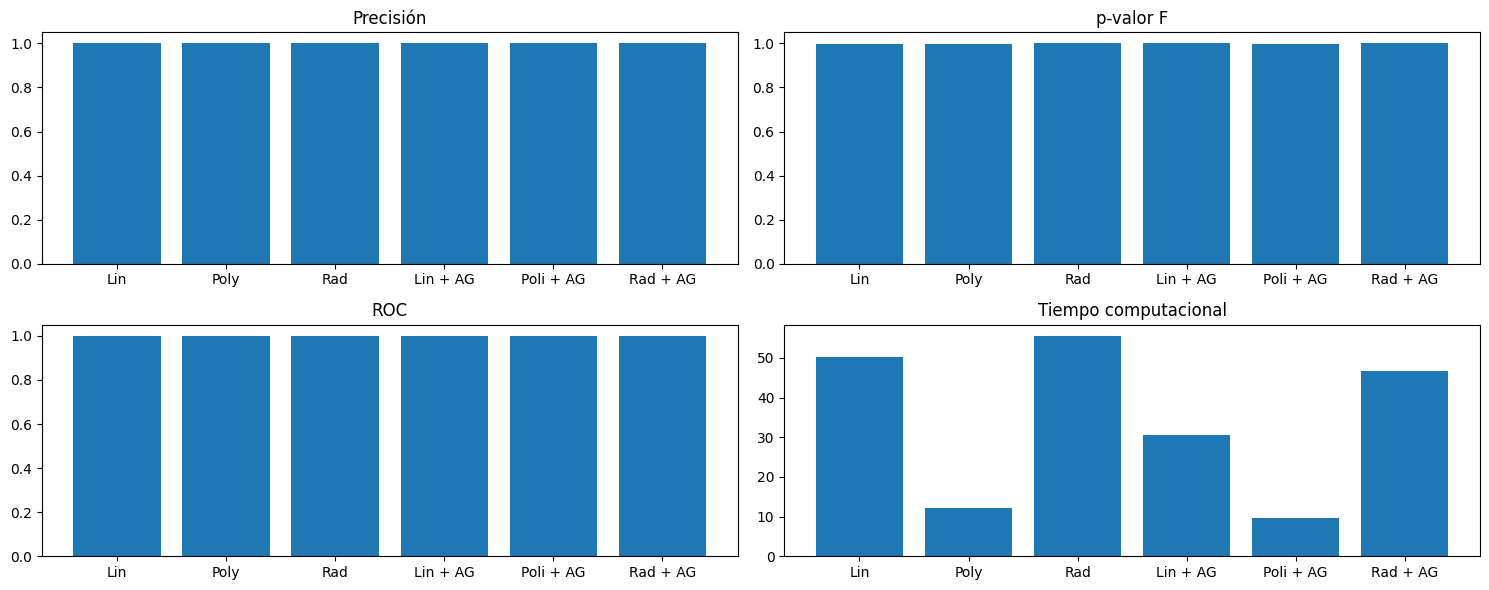

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza estos valores con los tuyos)
categorias = ['Lin','Poly','Rad','Lin + AG','Poli + AG','Rad + AG']
valores_1 = [acu_lin,acu_poly,acu_rad,acu_lin_AG,acu_poly_AG,acu_rad_AG]
valores_2 = [p_value_lin,p_value_poly,p_value_rad,p_value_lin_AG,p_value_poly_AG,p_value_rad_AG]
valores_3 = [roc_lin,roc_poly,roc_rad,roc_lin_AG,roc_poly_AG,roc_rad_AG]
valores_4 = [fin_lin-inicio_lin,fin_poly-inicio_poly,fin_rad-inicio_rad,fin_lin_AG-inicio_lin_AG,fin_poly_AG-inicio_poly_AG, fin_rad_AG-inicio_rad_AG]

# Crear cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

# Gráfico 1
axs[0, 0].bar(categorias, valores_1)
axs[0, 0].set_title('Precisión')

# Gráfico 2
axs[0, 1].bar(categorias, valores_2)
axs[0, 1].set_title('p-valor F')

# Gráfico 3
axs[1, 0].bar(categorias, valores_3)
axs[1, 0].set_title('ROC')

# Gráfico 4
axs[1, 1].bar(categorias, valores_4)
axs[1, 1].set_title('Tiempo computacional')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## **Ensamblaje por boosting**

### **Creamos los modelos**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

y=df["Class"]
y=np.array(y)
x=df.drop(['Class'], axis=1)
a = np.array(x)

# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por bagging
inicio_lin = time.time()
adaboost_model_li = AdaBoostClassifier(estimator=clf_lin, random_state=0, algorithm="SAMME", n_estimators=2, learning_rate=2)
adaboost_model_li.fit(x_train, y_train)
pred_lin = adaboost_model_li.predict(x)
fin_lin = time.time()

inicio_poly = time.time()
adaboost_model_poly = AdaBoostClassifier(estimator=clf_poly, random_state=0, algorithm="SAMME", n_estimators=2, learning_rate=2)
adaboost_model_poly.fit(x_train, y_train)
pred_poly = adaboost_model_poly.predict(x)
fin_poly = time.time()

inicio_rad = time.time()
adaboost_model_rad = AdaBoostClassifier(estimator=clf_rad, random_state=0, algorithm="SAMME", n_estimators=2, learning_rate=2)
adaboost_model_rad.fit(x_train, y_train)
pred_rad = adaboost_model_rad.predict(x)
fin_rad = time.time()

### **Ahora utilizando el algoritmo genético**

In [ ]:
# LLamamos nuevamente al conjuto de datos
y=df["Class"]
y=np.array(y)
x=df.drop(['Class'], axis=1)

# Utiliza .iloc para seleccionar las columnas por índice
x=x2
a = np.array(x)


# Escalamos los datos para poder trabajar con ellos
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustamos todos los modelos por boosting
inicio_lin_AG = time.time()
adaboost_model_li_AG = AdaBoostClassifier(estimator=clf_lin_AG, random_state=0, algorithm="SAMME", n_estimators=2, learning_rate=2)
adaboost_model_li_AG.fit(x_train, y_train)
pred_lin_AG = adaboost_model_li_AG.predict(x)
fin_lin_AG = time.time()

inicio_poly_AG = time.time()
adaboost_model_poly_AG = AdaBoostClassifier(estimator=clf_poly_AG, random_state=0, algorithm="SAMME", n_estimators=2, learning_rate=2)
adaboost_model_poly_AG.fit(x_train, y_train)
pred_poly_AG = adaboost_model_poly_AG.predict(x)
fin_poly_AG = time.time()

inicio_rad_AG = time.time()
adaboost_model_rad_AG = AdaBoostClassifier(estimator=clf_rad_AG, random_state=0, algorithm="SAMME", n_estimators=2, learning_rate=2)
adaboost_model_rad_AG.fit(x_train, y_train)
pred_rad_AG = adaboost_model_rad_AG.predict(x)
fin_rad_AG = time.time()

### **Hallamos las medidas de interés**

In [ ]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Aplica la prueba F y valor AUC de la curva ROC

f_statistic_lin, p_value_lin = f_oneway(pred_lin, y)
roc_lin=roc_auc_score(y,pred_lin)
acu_lin=accuracy_score(pred_lin, y)

f_statistic_poly, p_value_poly = f_oneway(pred_poly, y)
roc_poly=roc_auc_score(pred_poly, y)
acu_poly=accuracy_score(pred_poly, y)

f_statistic_rad, p_value_rad = f_oneway(pred_rad, y)
roc_rad=roc_auc_score(y,pred_lin)
acu_rad=accuracy_score(pred_rad, y)


# Ahora con algoritmo genético

f_statistic_lin_AG, p_value_lin_AG = f_oneway(pred_lin_AG, y)
roc_lin_AG=roc_auc_score(y,pred_lin)
acu_lin_AG=accuracy_score(pred_lin_AG, y)

f_statistic_poly_AG, p_value_poly_AG = f_oneway(pred_poly_AG, y)
roc_poly_AG=roc_auc_score(pred_poly_AG, y)
acu_poly_AG=accuracy_score(pred_poly_AG, y)

f_statistic_rad_AG, p_value_rad_AG = f_oneway(pred_rad_AG, y)
roc_rad_AG=roc_auc_score(y,pred_lin)
acu_rad_AG=accuracy_score(pred_rad_AG, y)


#Imprimimos las precisiones y los tiempos
print("La precisición del kernell lineal es ", round(acu_lin*100,3),", el p-valor del estadístico F es", round(p_value_lin,6), 'y el valor auc-roc es de', round(roc_lin,6),'en',round(fin_lin-inicio_lin,4),"segundos \n")
print("La precisición del kernell polinomial es ", round(acu_poly*100,3),", el p-valor del estadístico F es", round(p_value_poly,6), 'y el valor auc-roc es de', round(roc_poly,6),'en',round(fin_poly-inicio_poly,4),"segundos \n")
print("La precisición del kernell radial es ", round(acu_rad*100,3),", el p-valor del estadístico F es", round(p_value_rad,6), 'y el valor auc-roc es de', round(roc_rad,6),'en',round(fin_rad-inicio_rad,4),"segundos \n")

print("La precisición del kernell lineal con AG es ", round(acu_lin_AG*100,3),", el p-valor del estadístico F es", round(p_value_lin_AG,6), 'y el valor auc-roc es de', round(roc_lin_AG,6),'en',round(fin_lin_AG-inicio_lin_AG,4),"segundos \n")
print("La precisición del kernell polinomial con AG es ", round(acu_poly_AG*100,3),", el p-valor del estadístico F es", round(p_value_poly_AG,6), 'y el valor auc-roc es de', round(roc_poly_AG,6),'en',round(fin_poly_AG-inicio_poly_AG,4),"segundos \n")
print("La precisición del kernell radial con AG es ", round(acu_rad_AG*100,3),", el p-valor del estadístico F es", round(p_value_rad_AG,6), 'y el valor auc-roc es de', round(roc_rad_AG,6),'en',round(fin_rad_AG-inicio_rad_AG,4),"segundos \n")


La precisición del kernell lineal es  49.347 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 1309.2079 segundos 

La precisición del kernell polinomial es  53.275 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.709602 en 1033.4875 segundos 

La precisición del kernell radial es  49.347 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 2464.4136 segundos 

La precisición del kernell lineal con AG es  49.347 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 1185.3267 segundos 

La precisición del kernell polinomial con AG es  51.952 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.612466 en 928.096 segundos 

La precisición del kernell radial con AG es  49.347 , el p-valor del estadístico F es 0.0 y el valor auc-roc es de 0.5 en 2249.7098 segundos 



### **Graficamos los resultados**

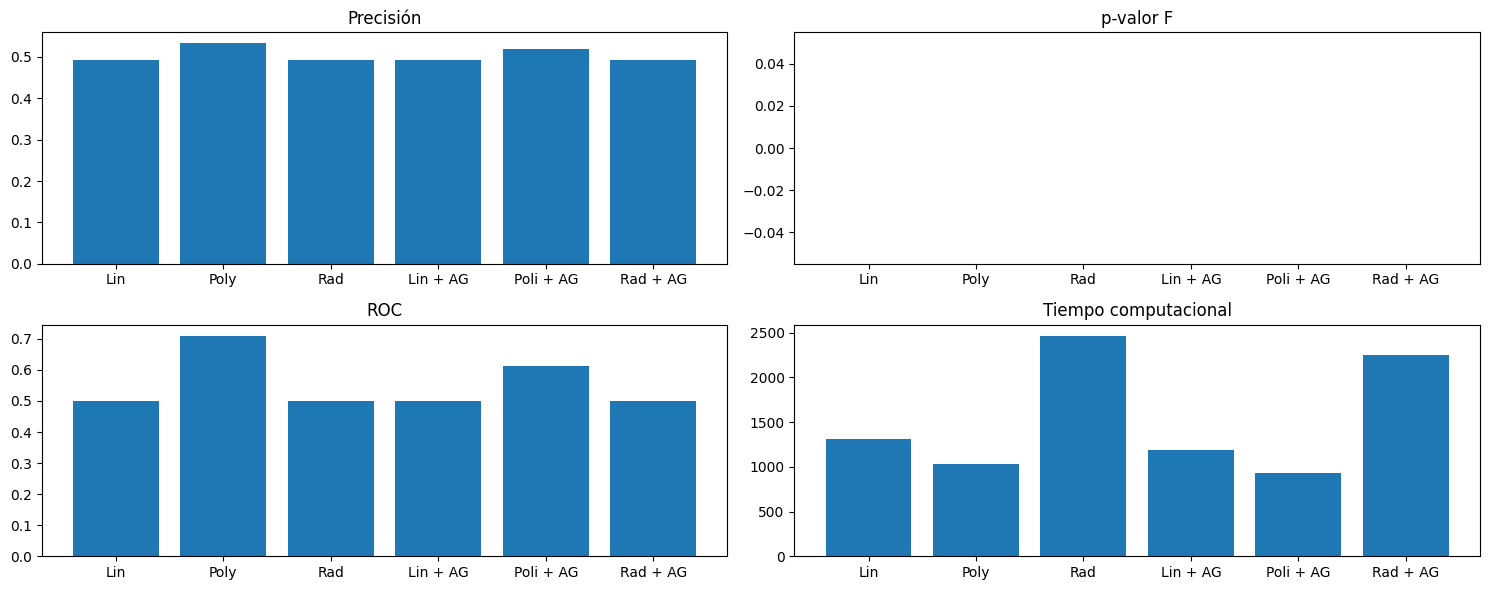

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza estos valores con los tuyos)
categorias = ['Lin','Poly','Rad','Lin + AG','Poli + AG','Rad + AG']
valores_1 = [acu_lin,acu_poly,acu_rad,acu_lin_AG,acu_poly_AG,acu_rad_AG]
valores_2 = [p_value_lin,p_value_poly,p_value_rad,p_value_lin_AG,p_value_poly_AG,p_value_rad_AG]
valores_3 = [roc_lin,roc_poly,roc_rad,roc_lin_AG,roc_poly_AG,roc_rad_AG]
valores_4 = [fin_lin-inicio_lin,fin_poly-inicio_poly,fin_rad-inicio_rad,fin_lin_AG-inicio_lin_AG,fin_poly_AG-inicio_poly_AG, fin_rad_AG-inicio_rad_AG]

# Crear cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

# Gráfico 1
axs[0, 0].bar(categorias, valores_1)
axs[0, 0].set_title('Precisión')

# Gráfico 2
axs[0, 1].bar(categorias, valores_2)
axs[0, 1].set_title('p-valor F')

# Gráfico 3
axs[1, 0].bar(categorias, valores_3)
axs[1, 0].set_title('ROC')

# Gráfico 4
axs[1, 1].bar(categorias, valores_4)
axs[1, 1].set_title('Tiempo computacional')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()